In [4]:
# 第一次加强contrast
# 再来一次加强contrast

import cv2
import numpy as np
import matplotlib.pyplot as plt
    
img = cv2.imread(r'foo66.jpg', cv2.IMREAD_GRAYSCALE)#GRAYSCALE
 
#线性变换
a = 2
O = float(a) * img
O[O>255] = 255 #大于255要截断为255
    
#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)

cv2.imwrite("Improved1.jpg", O)
cv2.waitKey(0)
cv2.destroyAllWindows()    



In [13]:
# 再来一次加强contrast

import cv2
import numpy as np
import matplotlib.pyplot as plt
    
img = cv2.imread(r'Improved1.jpg', cv2.IMREAD_GRAYSCALE)#GRAYSCALE
image_enhanced = cv2.equalizeHist(img) 
# #线性变换
# a = 2
# O = float(a) * img
# O[O>255] = 255 #大于255要截断为255
    
# #数据类型的转换
# O = np.round(O)
# O = O.astype(np.uint8)

cv2.imwrite("Improved2.jpg", image_enhanced)
cv2.waitKey(0)
cv2.destroyAllWindows()    

In [14]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse

image = cv.imread('Improved2.jpg')
if image is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# # but we wanted to show you how to access the pixels :)
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
cv.imwrite("Improved3.jpg", new_image)
cv.waitKey(0)
cv.destroyAllWindows()    

print('im done')



 Basic Linear Transforms 
-------------------------
* Enter the alpha value [1.0-3.0]: 2.5
* Enter the beta value [0-100]: 90
im done


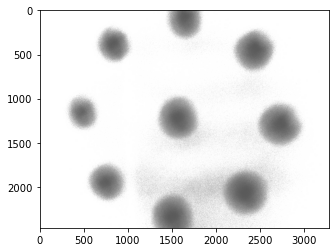

1
[[[2316 2040  270]
  [2292 2042  268]
  [2308 2058  268]
  ...
  [1346    8  161]
  [1952   38  151]
  [1876   64  152]]]
[2316 2040  270]
8447
1725
1346
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
247
1584
1228
240
296
1576
1260
232
537
1614
1256
269
574
1586
1208
233
621
1634
1244
268
656
1604
1230
246
739
1596
1296
213
747
1594
1272
206
840
1576
1310
226
851
1658
1248
292
854
1620
1280
232
872
1626
1218
278
894
1654
1214
288
895
1592
1248
215
956
1636
1266
262
1060
1672
1204
311
1111
1678
1230
293
1113
1646
1296
244
1145
1682
1250
282
1189
1712
1202
316
1199
1636
1200
278
1223
1660
1268
273
1245
1594
1322
225
1310
1702
1226
306
1431
1628
1306
222
1458
1630
1334
205
1492
1606
1344
209
1547
1668
1290
264
1766
1690
1270
292
1818
1708
1252
311
2025
1656
1356
175
2034
1722
1222
309
2101
1600
1364
195
2162
1646
1316
191
2207
1676
1312
223
2263
1668
1334
209
2272
1752
1220
351
2307
1690
1296
238
2368
1630
1356
173
2421
1646
1386
175
2477
1580
1358
197
2559
1676
1352
168
2571
1706
1284
238
2596
1614
1

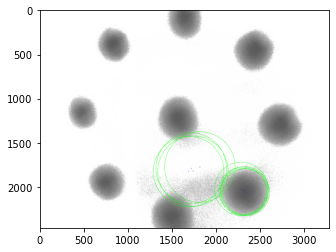

In [1]:
# 找中间圆和检测其他圆
# minr 30 MAXR 50

#https://developpaper.com/opencv-hough-circle-transform-cv2-houghcircles/
#Hoff circle detection
from matplotlib import pyplot as plt
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow #https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow

cimg = cv2.imread('Improved3.jpg')
plt.imshow(cimg)
plt.show()
#cv2.waitKey(0)
img = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

#- img: grayscale image to be detected
# - cv2.HOUGH_ Gradient: detection method, Hoff gradient
#- 1: the detected circle has the same size as the original image, DP = 2, and the detected circle is half of the original image
#- 20: the minimum distance of the center of the detected circle (if the parameter is too small, multiple adjacent circles may be detected incorrectly in addition to a real circle. If it is too large, some circles may be missed.)
#- Param1: in #hough Š In the case of u gradient, it is higher. Two thresholds are passed to Canny edge detector (the lower one is twice as small).
#- param2: at #hough Š In the case of u gradient, it is the accumulator threshold of the center of the detection stage. The smaller it is, the more likely it is to detect false circles;
#- minradius: minimum circle radius, false circle may also be detected
#- maxradius: maximum circle radius. If < = 0, the maximum image size is used. If < 0, returns the center of the radius not found.
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,param1=50, param2=30, minRadius=150, maxRadius=400)
#If the minimum circle radius is not set properly, false circles may also be detected
# circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
#                            param1=50, param2=40, minRadius=0, maxRadius=0)
# circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
#                            param1=50, param2=30, minRadius=10, maxRadius=0)

circles = np.uint16(np.around(circles))

print(len(circles))
print(circles)
print(circles[0,0])

# finding center circle 
prev = 0
sumX = 0
sumY = 0
n = 0
Xavg = 0
Yavg = 0
for i in circles[0, :]:
    sumX = sumX + i[0]
    sumY = sumY + i[1]
    n = n + 1
    
Xavg = sumX / n
Yavg = sumY / n
print(n)
print(int(Xavg))
print(int(Yavg))
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

# find the center circle
centerX = 0;
centerY = 0;
m = 0
for i in circles[0, :]:
    if i[0] < Xavg + 150 and Xavg - 150 < i[0]:
        if i[1] < Yavg + 150 and Yavg - 150 < i[1]:  
            centerX = i[0]
            centerY = i[1]
            print(m)
            print(i[0])
            print(i[1])
            print(i[2])
    m = m + 1
k = 0
for i in circles[0, :]:
  if k < 9:
    #Draw outer circle (blue)
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

    #Draw Center (red)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    k = k+1
#     cv2_imshow(cimg)
    plt.imshow(cimg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()